In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode # Not for algorithm! Algorithm is from Scratch

# 3/ KNN Classifier function including Data Splite, Accuracy and Confusion 

In [2]:
def Database_Spliting(data): # spliting data in 80-20 order for train and test 
    num_all = data.shape[0] 
    #print (num_all)
    split_ind = int(80 / 100 * num_all)
    test_data = data.iloc[split_ind:].reset_index(drop=True)
    train_data = data.iloc[0:split_ind].reset_index(drop=True)
    return test_data, train_data
    
class KNN_Classifier() : 
    def __init__( self, K ) :
        self.K = K          

    def fit(self, X_train, Y_train ) :
        self.X_train = X_train
        self.Y_train = Y_train
        self.m, self.n = X_train.shape
  
    def predict( self, X_test ) :
        self.X_test = X_test
        self.m_test, self.n = X_test.shape
        Y_predict = np.zeros( self.m_test )
        for i in range( self.m_test ) :
            x = self.X_test[i]
            neighbors = np.zeros( self.K )
            neighbors = self.find_neighbors( x )
            Y_predict[i] = mode( neighbors )[0][0]    
        return Y_predict

    def find_neighbors( self, x ) :
        euclidean_distances = np.zeros( self.m )
        for i in range( self.m ) :
            d = self.euclidean( x, self.X_train[i] )
            euclidean_distances[i] = d
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        return Y_train_sorted[:self.K]

    def euclidean( self, x, x_train ) :
        return np.sqrt( np.sum( np.square( x - x_train ) ) )  
    
def Confusion_Matrix(prediction, targets): 
    conf = np.zeros((3, 3), dtype=np.int32)
    #Prediction = np.array(prediction)
    #Target = np.array(targets)
    for i in range(len(prediction)):
        if prediction[i] == 3: 
            if targets[i] == 3:
                conf[0][0] += 1
            elif targets[i] == 2:
                conf[0][1] += 1
            elif targets[i] == 1:
                conf[0][2] += 1
        elif prediction[i] == 2: 
            if targets[i] == 3:
                conf[1][0] += 1
            elif targets[i] == 2:
                conf[1][1] += 1
            elif targets[i] == 1:
                conf[1][2] += 1
        elif prediction[i] == 1: 
            if targets[i] == 3:
                conf[2][0] += 1
            elif targets[i] == 2:
                conf[2][1] += 1
            elif targets[i] == 1:
                conf[2][2] += 1
    print(conf)
    
def Accuracy(Y_pred,Y_test):
    correctly_classified = 0      
    count = 0
    for count in range(np.size(Y_pred)) :
        if Y_test[count] == Y_pred[count] :
            correctly_classified = correctly_classified + 1              
        count = count + 1
    return ((correctly_classified / count)*100)

# A/ Applying KNN Algorithm without any preprocessing

In [10]:
df = pd.read_csv(r'E:\university\Term_7\AI\HW\HW2\HW2\wine.csv')
df = df.sample(frac = 1).reset_index(drop = True)
X = df.iloc[:,1:]
Y = df.iloc[:,0]

X_test ,X_train = Database_Spliting (X)
Y_test ,Y_train = Database_Spliting (Y)

X_test = X_test.values
X_train = X_train.values

Y_test = Y_test.values 
Y_train = Y_train.values

K = 7
num_types = 3;

model = KNN_Classifier(K) 
model.fit(X_train, Y_train)

# Prediction on test set
Y_pred = model.predict(X_test)

print( "KNN Accuracy with no preprocessing: ", Accuracy(Y_pred,Y_test))
Confusion_Matrix(Y_pred,Y_test)

KNN Accuracy with no preprocessing:  75.0
[[ 5  4  0]
 [ 3 11  0]
 [ 2  0 11]]


In [7]:
pip install metric-learn

Note: you may need to restart the kernel to use updated packages.


# B/ Applying KNN Algorithm using 1)LMNN and 2)NCA

In [15]:
from metric_learn import LMNN
from metric_learn import NCA

df = pd.read_csv(r'E:\university\Term_7\AI\HW\HW2\HW2\wine.csv')
df = df.sample(frac = 1).reset_index(drop = True)
X = df.iloc[:,1:]
Y = df.iloc[:,0]

X_test ,X_train = Database_Spliting (X)
Y_test ,Y_train = Database_Spliting (Y)

X_test = X_test.values
X_train = X_train.values

Y_test = Y_test.values 
Y_train = Y_train.values


K = 5
model_LMNN = KNN_Classifier(K)
model_NCA = KNN_Classifier(K)

######### LMNN
lmnn = LMNN(k=5, learn_rate=1e-6)
lmnn.fit(X_train,Y_train)
X_train_LMNN = lmnn.transform(X_train)
print ("LMNN X is: ",X_train_LMNN)
X_test_LMNN = lmnn.transform(X_test)

 
model_LMNN.fit(X_train_LMNN, Y_train)
Y_pred_LMNN = model_LMNN.predict(X_test_LMNN)

######### NCA
nca = NCA(max_iter=1000)
nca.fit(X_train, Y_train)

X_train_NCA = nca.transform(X_train)
print ("NCA X is: ",X_train_NCA)
X_test_NCA = nca.transform(X_test)

model_NCA.fit(X_train_NCA, Y_train)
Y_pred_NCA = model_NCA.predict(X_test_NCA)



print( "KNN Accuracy using LMNN: ", Accuracy(Y_pred_LMNN,Y_test))
Confusion_Matrix(Y_pred_LMNN,Y_test)
print( "KNN Accuracy using NCA: ", Accuracy(Y_pred_NCA,Y_test))

Confusion_Matrix(Y_pred_NCA,Y_test)

LMNN X is:  [[ 1.49636816e+01  2.76072053e+00  5.14131518e+00 ... -6.30815944e-01
   2.51993262e-01  7.35207455e-02]
 [ 1.37390377e+01  1.24542086e+00  4.71946121e+00 ...  1.34072454e-01
   1.70133052e+00  5.58780457e-02]
 [ 1.38629611e+01  3.10197589e+00  5.26967595e+00 ... -3.15483248e-02
   2.33589541e+00  1.43088909e-01]
 ...
 [ 1.44408925e+01  1.63995340e+00  6.55331500e+00 ...  1.19201185e-01
   9.97476915e-01  2.27217751e-01]
 [ 1.40300159e+01  1.13544628e+00  3.97555609e+00 ... -1.11698316e-01
   1.91563246e+00 -2.56985496e-03]
 [ 1.61729608e+01  2.91819941e+00  8.58561063e+00 ... -3.70921781e-01
   2.71651138e+00  4.01243185e-01]]
NCA X is:  [[-30.54946906  -6.10640478  12.28790805 ...   6.78301189  12.88934244
  463.67696953]
 [-28.93155672  -7.12972339  10.95796634 ...   6.98698423  11.45729136
  433.4234958 ]
 [-39.35597727  -7.28588056  11.99797763 ...   8.33447807  12.27232574
  542.14650407]
 ...
 [-49.76755355 -12.39040548  14.23226283 ...  10.27235281  12.25857918
  65

# Comparing LMNN and NCA KNN

Text(0.5, 1.0, 'KNN Algorithm using preprocessing')

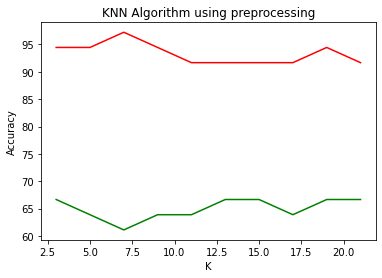

In [14]:
import matplotlib.pyplot as plt

k = np.array([3,5,7,9,11,13,15,17,19,21])
size_K = np.size(k)
Acc_L = np.zeros(size_K)
Acc_N = np.zeros(size_K)

for i in range(size_K):
    model_LMNN = KNN_Classifier(K=k[i])
    model_NCA = KNN_Classifier(K=k[i]) 
    model_LMNN.fit(X_train_LMNN, Y_train)
    model_NCA.fit(X_train_NCA, Y_train)
    Y_pred_LMNN = model_LMNN.predict(X_test_LMNN)
    Y_pred_NCA = model_NCA.predict(X_test_NCA)
    Acc_L[i]=Accuracy(Y_pred_LMNN,Y_test)
    Acc_N[i]=Accuracy(Y_pred_NCA,Y_test)

plt.plot(k, Acc_L, color='r', label='LMNN')
plt.plot(k, Acc_N, color='g', label='NCA')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Algorithm using preprocessing")